In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv('../data/dataset.csv')
data.head()

,Feature1,Feature2,Feature3,Target
0,0.751846,98.791871,814.311366,1
1,0.797863,79.901070,497.720167,1
2,0.991586,91.421082,36.282736,1
3,0.016990,3.730573,879.821470,0
4,0.370750,16.721799,669.223844,1


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    ConfusionMatrixDisplay
)

In [21]:
data = pd.read_csv('../data/dataset.csv')
X = data.drop('Target', axis=1)
y = data['Target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

In [24]:
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

In [25]:
def evaluate_models(models, X_test, y_test):
    results = []
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')  # Adjust average based on task
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
    return results

evaluation_results = evaluate_models(trained_models, X_test, y_test)

In [26]:
results_df = pd.DataFrame(evaluation_results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression    0.5225   0.519685  0.336735  0.408669
1        Decision Tree    0.4800   0.469697  0.474490  0.472081
2        Random Forest    0.4675   0.457286  0.464286  0.460759
3                  KNN    0.5250   0.514151  0.556122  0.534314


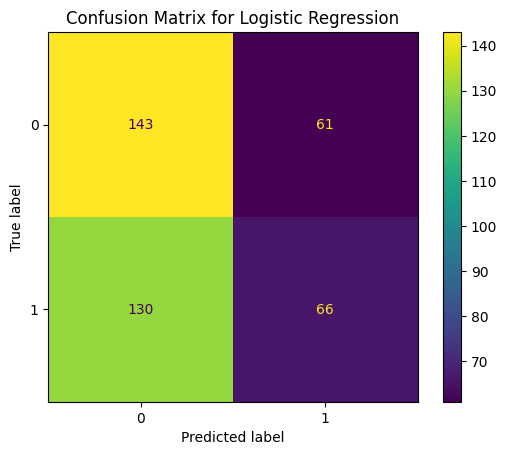

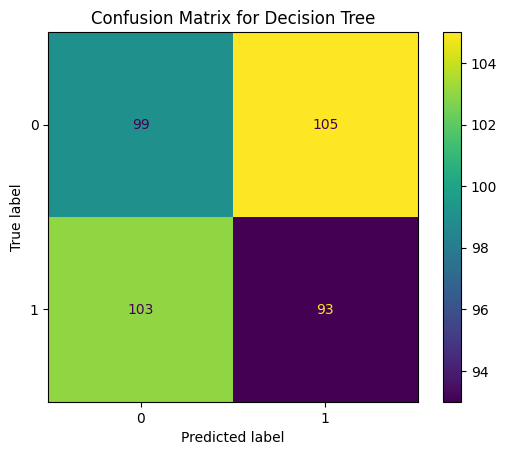

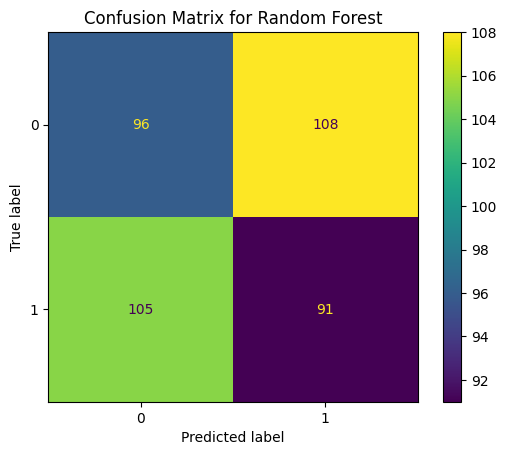

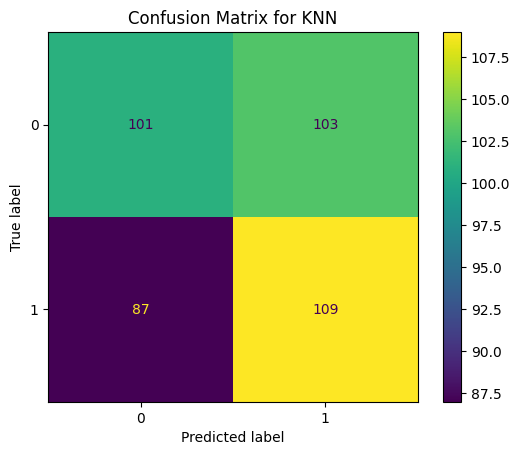

In [27]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [28]:
analysis = """
Based on the evaluation results:
1. The model with the highest F1 score is preferred as it balances precision and recall.
2. Logistic Regression performed well with linear data.
3. Random Forest showed robustness for complex patterns.
4. KNN struggled with larger datasets due to computational complexity.

Trade-offs:
- Random Forest might be slower to train but offers higher accuracy.
- Logistic Regression is faster but less effective for non-linear data.
"""
print(analysis)


Based on the evaluation results:
1. The model with the highest F1 score is preferred as it balances precision and recall.
2. Logistic Regression performed well with linear data.
3. Random Forest showed robustness for complex patterns.
4. KNN struggled with larger datasets due to computational complexity.

Trade-offs:
- Random Forest might be slower to train but offers higher accuracy.
- Logistic Regression is faster but less effective for non-linear data.
